In [1]:
###Librerías!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from fbprophet import Prophet

In [3]:
# Leamos y trabajemos un poquito los datos!

In [4]:
data = pd.read_csv('UC-TEST.csv', error_bad_lines=False) 
data.head(10)


,date_log1 per hour,source_ip: Descending,destination_port.keyword: Descending,Unique count of destination_ip
0,2021-09-16 00:00,172.16.8.136,0,195
1,2021-09-16 00:00,172.16.8.166,53,65
2,2021-09-16 00:00,172.16.8.166,443,2
3,2021-09-16 00:00,172.16.8.166,138,1
4,2021-09-16 00:00,10.246.241.2,80,16
5,2021-09-16 00:00,10.246.241.2,8181,12
6,2021-09-16 00:00,10.246.241.2,8282,12
7,2021-09-16 00:00,10.246.241.2,443,4
8,2021-09-16 00:00,10.246.241.2,9080,4
9,2021-09-16 00:00,10.246.241.2,25,2


In [5]:
data.tail(100)

,date_log1 per hour,source_ip: Descending,destination_port.keyword: Descending,Unique count of destination_ip
28076,2021-09-18 06:00,172.16.42.130,13000,1
28077,2021-09-18 06:00,172.16.42.130,443,1
28078,2021-09-18 06:00,172.16.42.130,53,1
28079,2021-09-18 06:00,172.18.0.147,53,2
28080,2021-09-18 06:00,172.18.0.147,13111,1
...,...,...,...,...
28171,2021-09-18 06:00,172.18.0.216,1813,1
28172,2021-09-18 06:00,172.18.0.217,1813,1
28173,2021-09-18 06:00,172.18.0.225,123,1
28174,2021-09-18 06:00,172.18.7.1,53,1


In [6]:
data.shape

(28176, 4)

In [7]:
# Esto equivale al summary de R!
data.describe()

,destination_port.keyword: Descending,Unique count of destination_ip
count,28176.000000,28176.000000
mean,5869.219265,2.941475
std,13027.437983,15.087159
min,0.000000,1.000000
25%,88.000000,1.000000
50%,443.000000,1.000000
75%,3268.000000,2.000000
max,65517.000000,812.000000


In [8]:
# Hagamos una pequeña  gráfica para ver los nulos!

<AxesSubplot:>

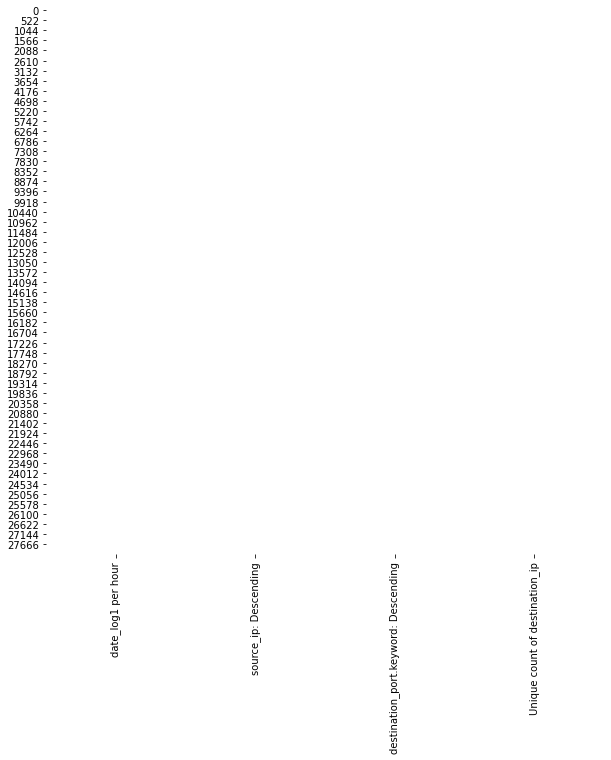

In [9]:
plt.figure(figsize = (10,10)) 
sns.heatmap(data.isnull(), cbar = False, cmap='gnuplot2_r')

In [10]:
# Al parecer no hay datos nulos, asi que estámos bien!

In [11]:
# Veamos ahora la relevancia de ciertas variables!

In [12]:
#Conteo de los elementos en la columna 'source_ip: Descending'
data['source_ip: Descending'].value_counts()


192.168.100.23    272
172.16.40.168     272
172.16.40.14      272
172.16.42.48      270
172.16.42.13      267
                 ... 
10.246.242.1        1
10.150.30.3         1
192.168.31.175      1
192.168.12.20       1
192.168.31.187      1
Name: source_ip: Descending, Length: 479, dtype: int64

In [13]:
#
data['destination_port.keyword: Descending'].value_counts()

443      4736
53       3616
80       1772
13111    1672
138      1495
         ... 
56706       1
60564       1
54387       1
54323       1
64551       1
Name: destination_port.keyword: Descending, Length: 255, dtype: int64

In [14]:
# Visualizemos las ip's mas relevantes, es decir, la con mayor numero de conexiones a puertos

<AxesSubplot:xlabel='count', ylabel='source_ip: Descending'>

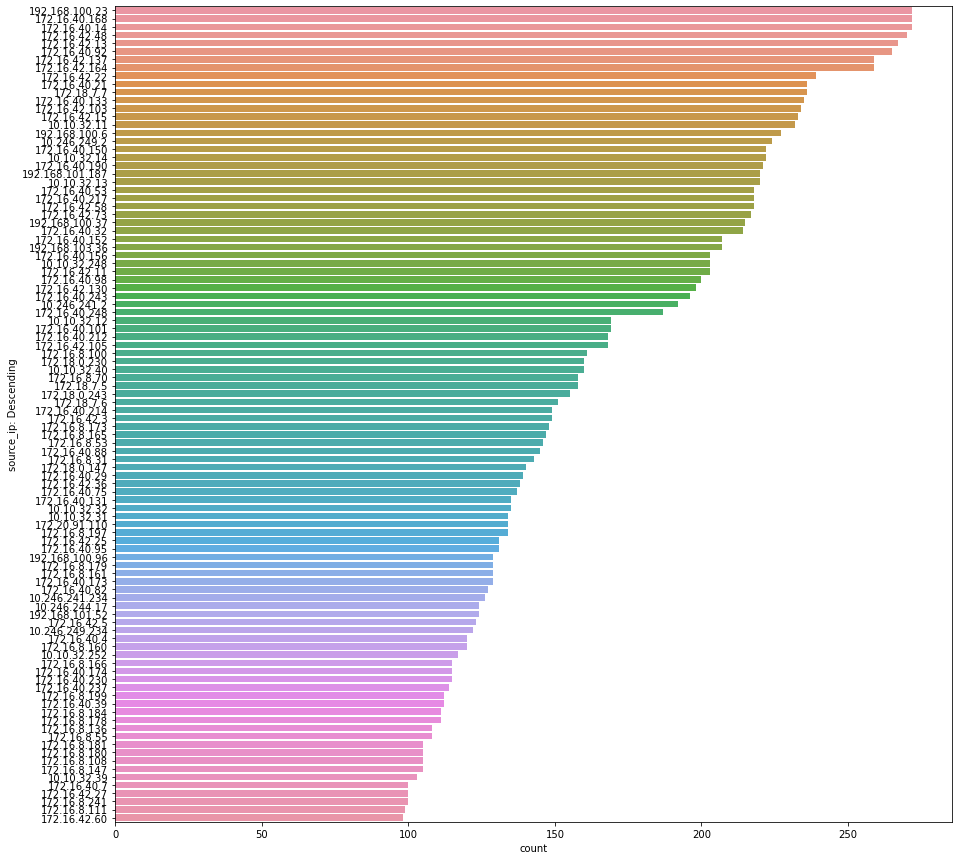

In [15]:
plt.figure(figsize=(15,15))

sns.countplot(y='source_ip: Descending', data=data,
              order = data['source_ip: Descending'].value_counts().iloc[:100].index)

In [16]:
# AHora los puertos mas relevantes


<AxesSubplot:xlabel='count', ylabel='destination_port.keyword: Descending'>

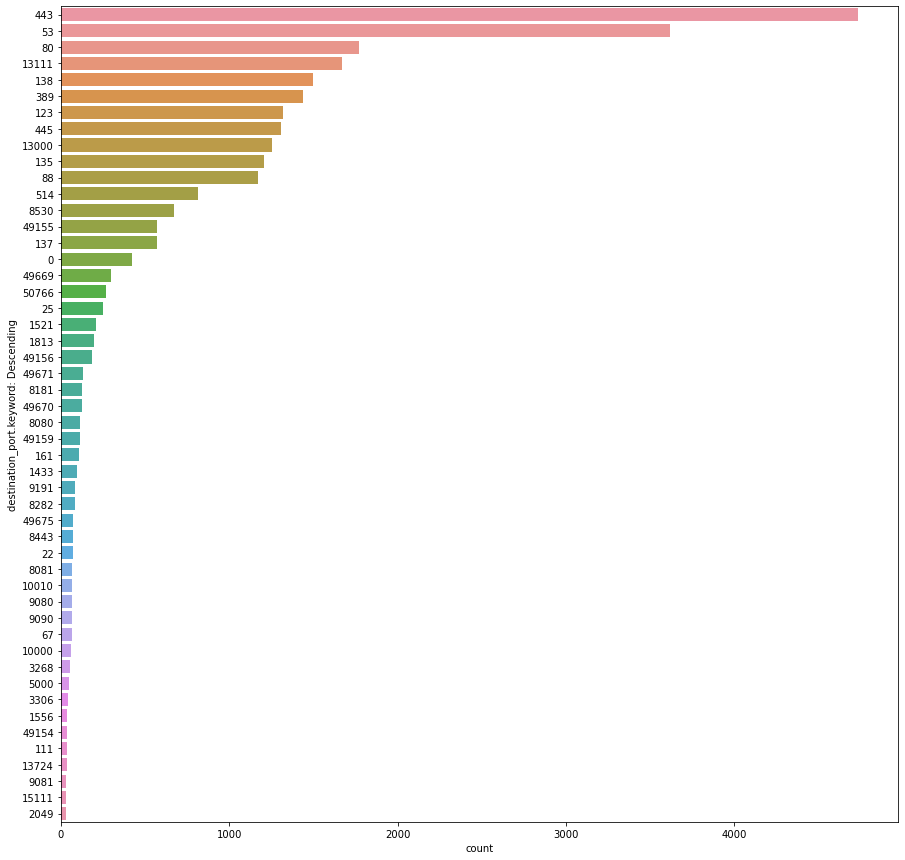

In [17]:
#Puertos con mayores conexiones
plt.figure(figsize=(15,15))
sns.countplot(y='destination_port.keyword: Descending', data = data,
             order = data['destination_port.keyword: Descending'].value_counts().iloc[:50].index)

In [18]:
# Veamos ahora algunas IP's especificas!

In [19]:
data['source_ip: Descending'] = data['source_ip: Descending'].map(str)

In [20]:
# IP con mayores conexiones
data_ip1 = data[data['source_ip: Descending'].str.contains(str('172.16.40.168'), na=False)]
data_ip1

,date_log1 per hour,source_ip: Descending,destination_port.keyword: Descending,Unique count of destination_ip
105,2021-09-16 00:00,172.16.40.168,53,2
106,2021-09-16 00:00,172.16.40.168,13000,1
107,2021-09-16 00:00,172.16.40.168,13111,1
108,2021-09-16 00:00,172.16.40.168,135,1
109,2021-09-16 00:00,172.16.40.168,443,1
...,...,...,...,...
27907,2021-09-18 06:00,172.16.40.168,53,2
27908,2021-09-18 06:00,172.16.40.168,13111,1
27909,2021-09-18 06:00,172.16.40.168,135,1
27910,2021-09-18 06:00,172.16.40.168,389,1


In [21]:
# Veamos los puertos a los que mas se conecta:

In [22]:
data_ip1['destination_port.keyword: Descending'].value_counts()

135      32
443      32
53       32
50766    32
13111    25
13000    21
80       19
389      16
445      15
88       12
49155    12
8530     11
49156     6
49669     3
49159     2
8443      1
49671     1
Name: destination_port.keyword: Descending, dtype: int64

<AxesSubplot:xlabel='count', ylabel='destination_port.keyword: Descending'>

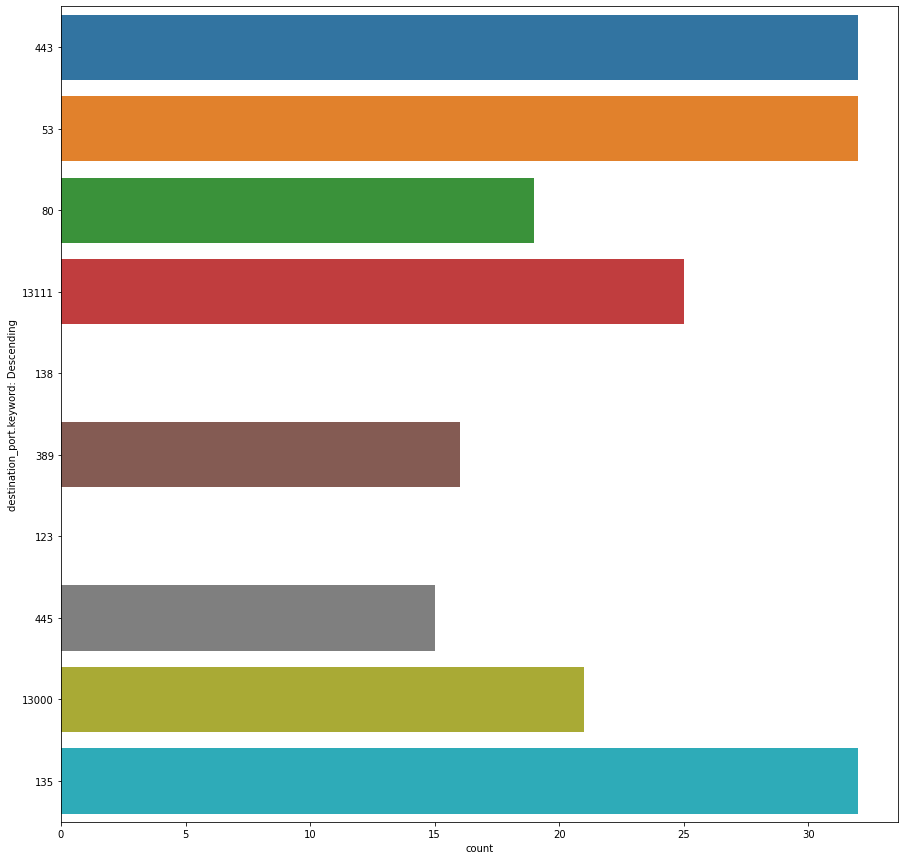

In [23]:
#Puertos con mayores conexiones
plt.figure(figsize=(15,15))
sns.countplot(y='destination_port.keyword: Descending', data = data_ip1,
             order = data['destination_port.keyword: Descending'].value_counts().iloc[:10].index)

In [24]:
data_ip1['Unique count of destination_ip'].value_counts()

1    184
2     55
3     18
4      8
5      7
Name: Unique count of destination_ip, dtype: int64

In [25]:
# Veamos que podemos graficar!

In [26]:
data_ip1.columns = ['Fecha', 'IP Origen', 'Puerto de Destino', 'UNIQUE COUNT IPs de Destino']
data_ip1.Fecha = pd.to_datetime(data_ip1.Fecha, format = '%Y/%m/%d %H:%M')
data_ip1.index = pd.DatetimeIndex(data_ip1.Fecha)

C:\Users\David\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [27]:
data_ip1.resample('H').size()

Fecha
2021-09-16 00:00:00     6
2021-09-16 01:00:00     4
2021-09-16 02:00:00     0
2021-09-16 03:00:00     4
2021-09-16 04:00:00     7
2021-09-16 05:00:00     7
2021-09-16 06:00:00     4
2021-09-16 07:00:00     9
2021-09-16 08:00:00     7
2021-09-16 09:00:00     0
2021-09-16 10:00:00     0
2021-09-16 11:00:00     0
2021-09-16 12:00:00     0
2021-09-16 13:00:00     0
2021-09-16 14:00:00     0
2021-09-16 15:00:00     0
2021-09-16 16:00:00     0
2021-09-16 17:00:00     0
2021-09-16 18:00:00     0
2021-09-16 19:00:00     0
2021-09-16 20:00:00     0
2021-09-16 21:00:00    12
2021-09-16 22:00:00     7
2021-09-16 23:00:00    12
2021-09-17 00:00:00    12
2021-09-17 01:00:00    13
2021-09-17 02:00:00     7
2021-09-17 03:00:00     7
2021-09-17 04:00:00    12
2021-09-17 05:00:00     8
2021-09-17 06:00:00    12
2021-09-17 07:00:00     7
2021-09-17 08:00:00     8
2021-09-17 09:00:00     4
2021-09-17 10:00:00     0
2021-09-17 11:00:00     0
2021-09-17 12:00:00     0
2021-09-17 13:00:00     0
2021-0

In [28]:
data_ip1

,Fecha,IP Origen,Puerto de Destino,UNIQUE COUNT IPs de Destino
Fecha,,,,
2021-09-16 00:00:00,2021-09-16 00:00:00,172.16.40.168,53,2
2021-09-16 00:00:00,2021-09-16 00:00:00,172.16.40.168,13000,1
2021-09-16 00:00:00,2021-09-16 00:00:00,172.16.40.168,13111,1
2021-09-16 00:00:00,2021-09-16 00:00:00,172.16.40.168,135,1
2021-09-16 00:00:00,2021-09-16 00:00:00,172.16.40.168,443,1
...,...,...,...,...
2021-09-18 06:00:00,2021-09-18 06:00:00,172.16.40.168,53,2
2021-09-18 06:00:00,2021-09-18 06:00:00,172.16.40.168,13111,1
2021-09-18 06:00:00,2021-09-18 06:00:00,172.16.40.168,135,1


Text(0, 0.5, 'Conexiones de la IP')

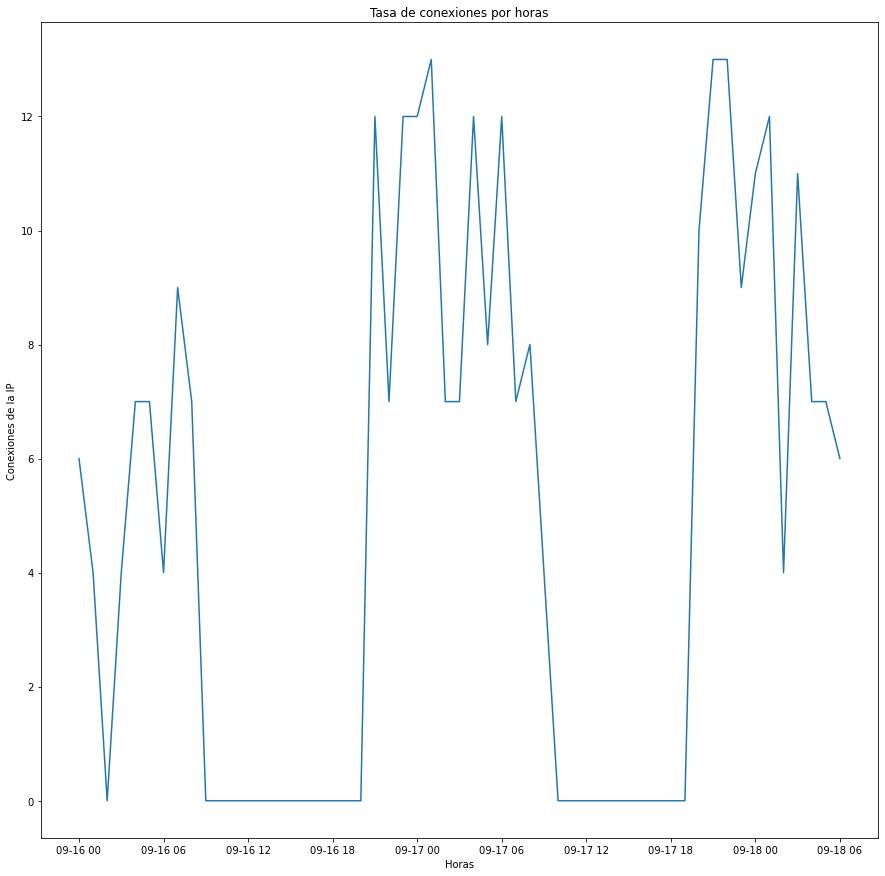

In [29]:
plt.figure(figsize=(15,15))
plt.plot(data_ip1.resample('H').size())
plt.title('Tasa de conexiones por horas')
plt.xlabel('Horas')
plt.ylabel('Conexiones de la IP')

In [30]:
#Veamos un puerto en especifico y las horas en la que se conecta esta IP

In [31]:

data_ip1_port = data_ip1[data_ip1['Puerto de Destino']==443]
data_ip1_port

,Fecha,IP Origen,Puerto de Destino,UNIQUE COUNT IPs de Destino
Fecha,,,,
2021-09-16 00:00:00,2021-09-16 00:00:00,172.16.40.168,443,1
2021-09-16 01:00:00,2021-09-16 01:00:00,172.16.40.168,443,3
2021-09-16 03:00:00,2021-09-16 03:00:00,172.16.40.168,443,1
2021-09-16 04:00:00,2021-09-16 04:00:00,172.16.40.168,443,3
2021-09-16 05:00:00,2021-09-16 05:00:00,172.16.40.168,443,3
2021-09-16 06:00:00,2021-09-16 06:00:00,172.16.40.168,443,2
2021-09-16 07:00:00,2021-09-16 07:00:00,172.16.40.168,443,3
2021-09-16 08:00:00,2021-09-16 08:00:00,172.16.40.168,443,2
2021-09-16 21:00:00,2021-09-16 21:00:00,172.16.40.168,443,5


Text(0, 0.5, 'Conexiones de la IP')

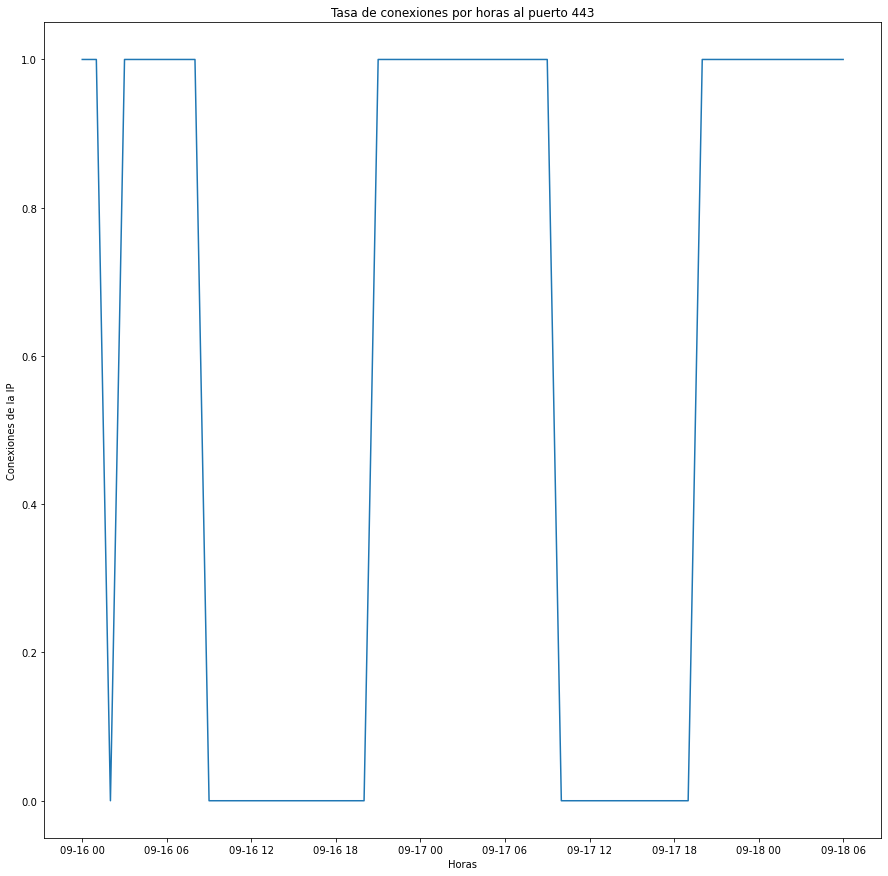

In [32]:
plt.figure(figsize=(15,15))
plt.plot(data_ip1_port.resample('H').size())
plt.title('Tasa de conexiones por horas al puerto 443')
plt.xlabel('Horas')
plt.ylabel('Conexiones de la IP')

In [33]:
# Considerando todos los datos, el mayor valor de unique count es
data['Unique count of destination_ip'].max()

812

In [34]:
# Ubiquemos su ID
data['Unique count of destination_ip'].idxmax()

4190

In [35]:
# veamos los datos de esa ID, que tiene un comportamiento 'anomalo'
data.loc[4190]

date_log1 per hour                      2021-09-16 07:00
source_ip: Descending                       172.16.8.166
destination_port.keyword: Descending                  53
Unique count of destination_ip                       812
Name: 4190, dtype: object

In [36]:
data_ip2 = data[data['source_ip: Descending'].str.contains(str('172.16.8.166'), na=False)]
data_ip2.columns = ['Fecha', 'IP Origen', 'Puerto de Destino', 'UNIQUE COUNT IPs de Destino']
data_ip2.Fecha = pd.to_datetime(data_ip2.Fecha, format = '%Y/%m/%d %H:%M')
data_ip2.index = pd.DatetimeIndex(data_ip2.Fecha)

C:\Users\David\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [37]:
data_ip2

,Fecha,IP Origen,Puerto de Destino,UNIQUE COUNT IPs de Destino
Fecha,,,,
2021-09-16 00:00:00,2021-09-16 00:00:00,172.16.8.166,53,65
2021-09-16 00:00:00,2021-09-16 00:00:00,172.16.8.166,443,2
2021-09-16 00:00:00,2021-09-16 00:00:00,172.16.8.166,138,1
2021-09-16 01:00:00,2021-09-16 01:00:00,172.16.8.166,53,158
2021-09-16 01:00:00,2021-09-16 01:00:00,172.16.8.166,443,4
...,...,...,...,...
2021-09-18 05:00:00,2021-09-18 05:00:00,172.16.8.166,53,139
2021-09-18 05:00:00,2021-09-18 05:00:00,172.16.8.166,443,3
2021-09-18 05:00:00,2021-09-18 05:00:00,172.16.8.166,138,1


In [38]:
data_ip2.resample('H').size()

Fecha
2021-09-16 00:00:00    3
2021-09-16 01:00:00    4
2021-09-16 02:00:00    0
2021-09-16 03:00:00    1
2021-09-16 04:00:00    3
2021-09-16 05:00:00    3
2021-09-16 06:00:00    2
2021-09-16 07:00:00    4
2021-09-16 08:00:00    2
2021-09-16 09:00:00    0
2021-09-16 10:00:00    0
2021-09-16 11:00:00    0
2021-09-16 12:00:00    0
2021-09-16 13:00:00    0
2021-09-16 14:00:00    0
2021-09-16 15:00:00    0
2021-09-16 16:00:00    0
2021-09-16 17:00:00    0
2021-09-16 18:00:00    0
2021-09-16 19:00:00    0
2021-09-16 20:00:00    0
2021-09-16 21:00:00    5
2021-09-16 22:00:00    4
2021-09-16 23:00:00    5
2021-09-17 00:00:00    3
2021-09-17 01:00:00    5
2021-09-17 02:00:00    4
2021-09-17 03:00:00    4
2021-09-17 04:00:00    4
2021-09-17 05:00:00    5
2021-09-17 06:00:00    3
2021-09-17 07:00:00    4
2021-09-17 08:00:00    5
2021-09-17 09:00:00    2
2021-09-17 10:00:00    0
2021-09-17 11:00:00    0
2021-09-17 12:00:00    0
2021-09-17 13:00:00    0
2021-09-17 14:00:00    0
2021-09-17 15:00:00

Text(0, 0.5, 'Conexiones de la IP')

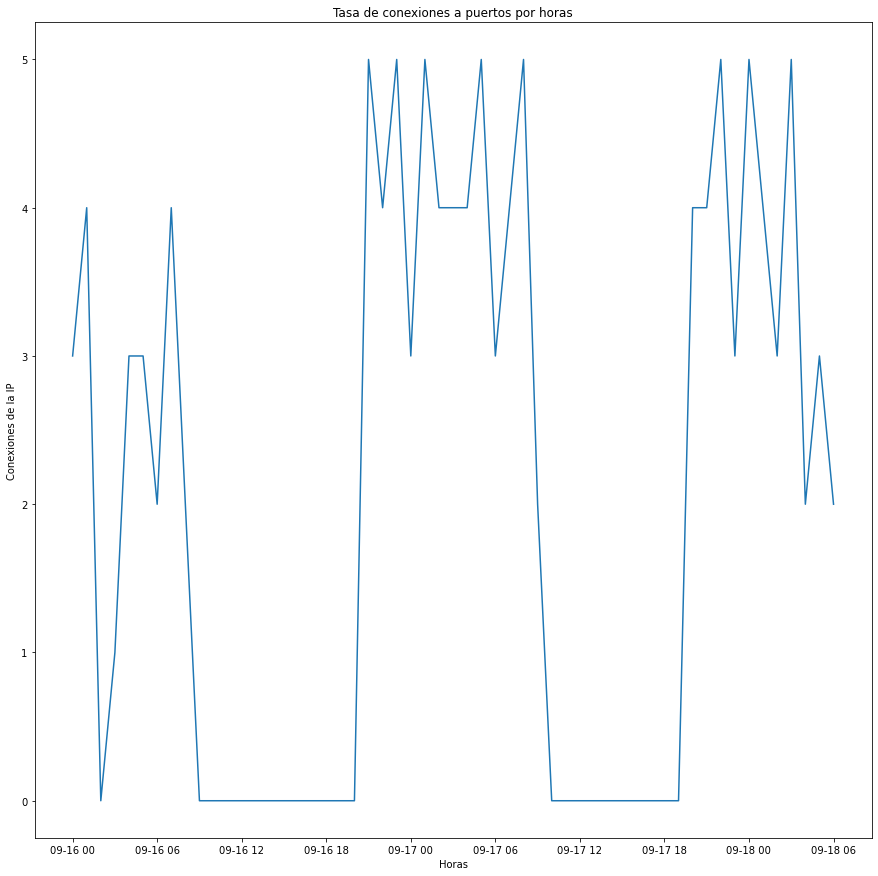

In [39]:
# Conexiones de puertos segun horas
plt.figure(figsize=(15,15))
plt.plot(data_ip2.resample('H').size())
plt.title('Tasa de conexiones a puertos por horas')
plt.xlabel('Horas')
plt.ylabel('Conexiones de la IP')

In [40]:
#Ahora revisemos la actividad del puerto en especifico
data_ip2_port = data_ip2[data_ip2['Puerto de Destino']==53]
data_ip2_port

,Fecha,IP Origen,Puerto de Destino,UNIQUE COUNT IPs de Destino
Fecha,,,,
2021-09-16 00:00:00,2021-09-16 00:00:00,172.16.8.166,53,65
2021-09-16 01:00:00,2021-09-16 01:00:00,172.16.8.166,53,158
2021-09-16 03:00:00,2021-09-16 03:00:00,172.16.8.166,53,52
2021-09-16 04:00:00,2021-09-16 04:00:00,172.16.8.166,53,166
2021-09-16 05:00:00,2021-09-16 05:00:00,172.16.8.166,53,227
2021-09-16 06:00:00,2021-09-16 06:00:00,172.16.8.166,53,230
2021-09-16 07:00:00,2021-09-16 07:00:00,172.16.8.166,53,812
2021-09-16 08:00:00,2021-09-16 08:00:00,172.16.8.166,53,490
2021-09-16 21:00:00,2021-09-16 21:00:00,172.16.8.166,53,435


In [41]:
data_ip2_port['UNIQUE COUNT IPs de Destino']

Fecha
2021-09-16 00:00:00     65
2021-09-16 01:00:00    158
2021-09-16 03:00:00     52
2021-09-16 04:00:00    166
2021-09-16 05:00:00    227
2021-09-16 06:00:00    230
2021-09-16 07:00:00    812
2021-09-16 08:00:00    490
2021-09-16 21:00:00    435
2021-09-16 22:00:00    251
2021-09-16 23:00:00    267
2021-09-17 00:00:00    251
2021-09-17 01:00:00    325
2021-09-17 02:00:00    243
2021-09-17 03:00:00    219
2021-09-17 04:00:00    279
2021-09-17 05:00:00    277
2021-09-17 06:00:00    296
2021-09-17 07:00:00    221
2021-09-17 08:00:00    230
2021-09-17 09:00:00    103
2021-09-17 20:00:00    224
2021-09-17 21:00:00    334
2021-09-17 22:00:00    319
2021-09-17 23:00:00    339
2021-09-18 00:00:00    289
2021-09-18 01:00:00    309
2021-09-18 02:00:00    156
2021-09-18 03:00:00    299
2021-09-18 04:00:00    182
2021-09-18 05:00:00    139
2021-09-18 06:00:00    130
Name: UNIQUE COUNT IPs de Destino, dtype: int64

Text(0, 0.5, 'IPs de destino')

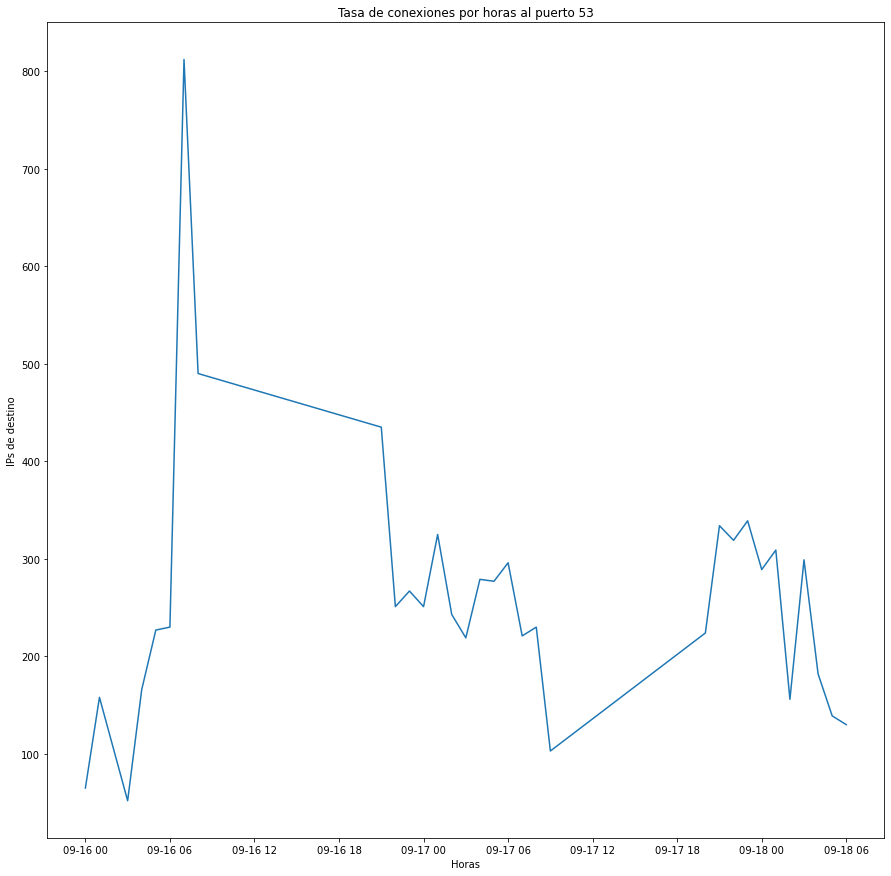

In [42]:
plt.figure(figsize=(15,15))
plt.plot(data_ip2_port['UNIQUE COUNT IPs de Destino'])
plt.title('Tasa de conexiones por horas al puerto 53')
plt.xlabel('Horas')
plt.ylabel('IPs de destino')

In [43]:
#Hagamos un poquito de series de tiempo y forecasting, pero por las caracteristicas de nuestros datos 
#POR AHORA lo haremos con solo una IP

In [49]:
# Probemos con la ip de mayor trafico de puertos
data_prophet = data[data['source_ip: Descending'].str.contains(str('172.16.40.168'), na=False)]
data_prophet.index = pd.DatetimeIndex(data_prophet['date_log1 per hour'])
data_prophet = data_prophet['Unique count of destination_ip'].resample('H').size().reset_index()
data_prophet.columns = ['ds', 'y']


In [53]:
#Creamos nuestra profecía
profeta = Prophet()
profeta.fit(data_prophet)
profeta

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [62]:
#Veamos los datos profetizados
futuro = profeta.make_future_dataframe(periods = 3)
forecast = profeta.predict(futuro)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-09-16 00:00:00,2.935576,4.944632,11.072955,2.935576,2.935576,5.093342,5.093342,5.093342,5.093342,5.093342,5.093342,0.0,0.0,0.0,8.028918
1,2021-09-16 01:00:00,2.995157,3.205647,9.298225,2.995157,2.995157,3.195080,3.195080,3.195080,3.195080,3.195080,3.195080,0.0,0.0,0.0,6.190236
2,2021-09-16 02:00:00,3.054737,2.240901,7.982993,3.054737,3.054737,2.021968,2.021968,2.021968,2.021968,2.021968,2.021968,0.0,0.0,0.0,5.076706
3,2021-09-16 03:00:00,3.114318,2.245087,8.190835,3.114318,3.114318,1.953004,1.953004,1.953004,1.953004,1.953004,1.953004,0.0,0.0,0.0,5.067322
4,2021-09-16 04:00:00,3.173899,3.098330,8.862615,3.173899,3.173899,2.657909,2.657909,2.657909,2.657909,2.657909,2.657909,0.0,0.0,0.0,5.831808
5,2021-09-16 05:00:00,3.233480,3.636700,9.630814,3.233480,3.233480,3.461471,3.461471,3.461471,3.461471,3.461471,3.461471,0.0,0.0,0.0,6.694951
6,2021-09-16 06:00:00,3.293061,4.090480,9.910935,3.293061,3.293061,3.727814,3.727814,3.727814,3.727814,3.727814,3.727814,0.0,0.0,0.0,7.020875
7,2021-09-16 07:00:00,3.352642,3.410518,9.594130,3.352642,3.352642,3.069149,3.069149,3.069149,3.069149,3.069149,3.069149,0.0,0.0,0.0,6.421791
8,2021-09-16 08:00:00,3.412223,1.703654,7.983849,3.412223,3.412223,1.425421,1.425421,1.425421,1.425421,1.425421,1.425421,0.0,0.0,0.0,4.837644
9,2021-09-16 09:00:00,3.471804,-0.533371,5.445850,3.471804,3.471804,-0.888370,-0.888370,-0.888370,-0.888370,-0.888370,-0.888370,0.0,0.0,0.0,2.583434


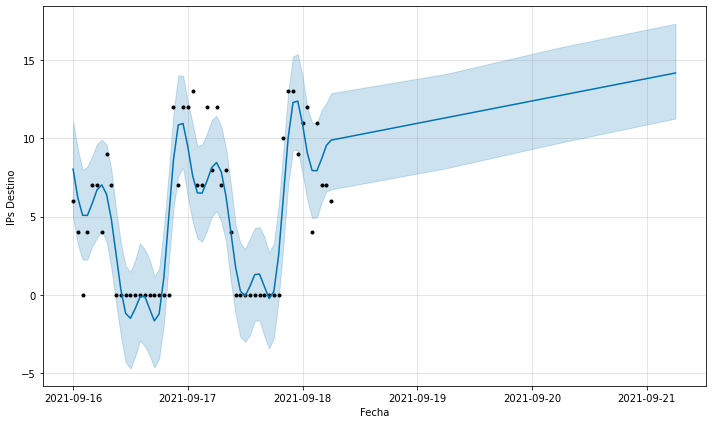

In [63]:
figure = profeta.plot(forecast, xlabel = 'Fecha', ylabel = 'IPs Destino')